# Лабораторная работа №1

Выполнила Сектименко Ирина, студент группы М8О-410Б-22

## Выбор датасета

Обе задачи я буду решать на одном и том же датасете. Однако выявляться будут разные закономерности.

Данный датасет привлек мое внимание, потому что в современном мире достаточно много людей потребляет кофе и есть много разных точек зрения о его вреде и полезности. По ходу решения задач будут выдвинуты разные гипотезы, которые позволят подтвердить или опровергнуть пользу или вред кофе.

### Классификация

In [3]:
import pandas as pd

In [360]:
class_df = pd.read_csv("synthetic_coffee_health_10000.csv")
class_df = class_df.drop('ID', axis=1)
class_df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Будем предсказывать уровень стресса человека.

### Регрессия

In [325]:
reg_df = pd.read_csv("synthetic_coffee_health_10000.csv")
reg_df = reg_df.drop('ID', axis=1)
reg_df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Будем предсказывать сколько часов спит человек, зная информацию о количестве потребляемого кофе, испытываемом стрессе.

### Метрики

Для задачи классификации будем считать accurancy, precision, recall, а для регрессии - MAE и MSE.

## Создание бейзлайна

### Классификация

Поработаем немного с данными. Переведем все категориальные признаки (Gender, Country, Occupation) в численные с помощью one-hot-encoding, потому что все значения этих признаков развноправны.

In [361]:
class_df = pd.get_dummies(class_df, columns=['Gender', 'Country', 'Occupation'], drop_first=True)
class_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,...,False,True,False,False,False,False,False,False,False,True


Часть категориальных признаков закодируем label-енкодером. К таким признакам относятся Sleep_Quality, Stress_Level, Health_Issues, потому что чем больше число, тем выше уровень страсса или проблем со здоровьем.

In [24]:
from sklearn.preprocessing import LabelEncoder

In [362]:
label_encoder = LabelEncoder()
class_df['Stress_Level'] = label_encoder.fit_transform(class_df['Stress_Level'])
class_df['Health_Issues'] = label_encoder.fit_transform(class_df['Health_Issues'])
class_df['Sleep_Quality'] = label_encoder.fit_transform(class_df['Sleep_Quality'])
class_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,2,24.9,78,1,14.5,3,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,2,20.0,67,1,11.0,3,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,1,22.7,59,2,11.2,0,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,2,24.7,71,1,6.6,0,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,1,24.1,76,2,8.5,0,...,False,True,False,False,False,False,False,False,False,True


Поделим датасет на тренировачные и тестирующий.

In [10]:
from sklearn.model_selection import train_test_split

In [168]:
class_train, class_test = train_test_split(class_df, test_size=0.2)

Выделим целевой признак.

In [225]:
class_x_train = class_train.drop('Stress_Level', axis=1)
class_y_train = class_train['Stress_Level']

class_x_test = class_test.drop('Stress_Level', axis=1)
class_y_test = class_test['Stress_Level']

Импортируем модель knn из библиотеки sklearn. Обучим ее на наших данных и спрогнозируем результат на обучающей и тестовой выборке.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [226]:
knn_class = KNeighborsClassifier(n_neighbors=3)

knn_class.fit(class_x_train, class_y_train)
class_y_train_pred = knn_class.predict(class_x_train)
class_y_test_pred = knn_class.predict(class_x_test)

Оценим качество обученной модели.

In [36]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60       779
           1       0.88      0.96      0.92      5565
           2       0.81      0.52      0.63      1656

    accuracy                           0.84      8000
   macro avg       0.75      0.70      0.72      8000
weighted avg       0.83      0.84      0.83      8000

              precision    recall  f1-score   support

           0       0.21      0.22      0.21       182
           1       0.79      0.89      0.84      1424
           2       0.45      0.23      0.30       394

    accuracy                           0.70      2000
   macro avg       0.48      0.45      0.45      2000
weighted avg       0.67      0.70      0.67      2000



Если на тренировочной выборке качество более менее, то на тестовой модель не справилась с предсказанием курящих людей.

### Регрессия

По факту у нас та же самая предобработка данных, что и в классификации. Разница только в выделении целевой переменной.

In [326]:
reg_df = pd.get_dummies(reg_df, columns=['Gender', 'Country', 'Occupation'], drop_first=True)
reg_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,...,False,True,False,False,False,False,False,False,False,True


In [327]:
label_encoder = LabelEncoder()
reg_df['Stress_Level'] = label_encoder.fit_transform(reg_df['Stress_Level'])
reg_df['Health_Issues'] = label_encoder.fit_transform(reg_df['Health_Issues'])
reg_df['Sleep_Quality'] = label_encoder.fit_transform(reg_df['Sleep_Quality'])
reg_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,2,24.9,78,1,14.5,3,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,2,20.0,67,1,11.0,3,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,1,22.7,59,2,11.2,0,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,2,24.7,71,1,6.6,0,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,1,24.1,76,2,8.5,0,...,False,True,False,False,False,False,False,False,False,True


In [328]:
reg_train, reg_test = train_test_split(reg_df, test_size=0.2)

In [329]:
reg_x_train = reg_train.drop('Sleep_Hours', axis=1)
reg_y_train = reg_train['Sleep_Hours']

reg_x_test = reg_test.drop('Sleep_Hours', axis=1)
reg_y_test = reg_test['Sleep_Hours']

Предобработка данных завершена. Теперь обучим и протестируем модель.

In [295]:
from sklearn.neighbors import KNeighborsRegressor

In [330]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)

knn_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = knn_regressor.predict(reg_x_train)
reg_y_test_pred = knn_regressor.predict(reg_x_test)

In [306]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [331]:
mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.7938504166666667
Среднеквадратичная ошибка теста: 1.6566733333333332
Средняя абсолютная ошибка трейна: 0.7060041666666667
Средняя абсолютная ошибка теста: 1.0168


## Улучшение бейзлайна

### Классификация

#### Гипотеза 1

Для начала надо проверить сбалансированность классов.

In [172]:
class_y_train.value_counts()

,count
Stress_Level,
1,5565
2,1656
0,779


In [177]:
print(class_y_train.value_counts().get(0) / len(class_y_train))
print(class_y_train.value_counts().get(1) / len(class_y_train))
print(class_y_train.value_counts().get(2) / len(class_y_train))

0.097375
0.695625
0.207


In [178]:
class_y_test.value_counts()

,count
Stress_Level,
1,1424
2,394
0,182


In [180]:
print(class_y_test.value_counts().get(0) / len(class_y_test))
print(class_y_test.value_counts().get(1) / len(class_y_test))
print(class_y_test.value_counts().get(2) / len(class_y_test))

0.091
0.712
0.197


Гипотеза не подтвердилась, классы примерно сбалансированны.

#### Гипотеза 2

Приверим кореляцию признаков. Посмотрим, какие из них линейно зависимы. Делать это будем с помощью матрицы корреляции.

Однако я уже сейчас могу предположить, что Sleep_Hours и Sleep_Quality линейно зависимы.

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

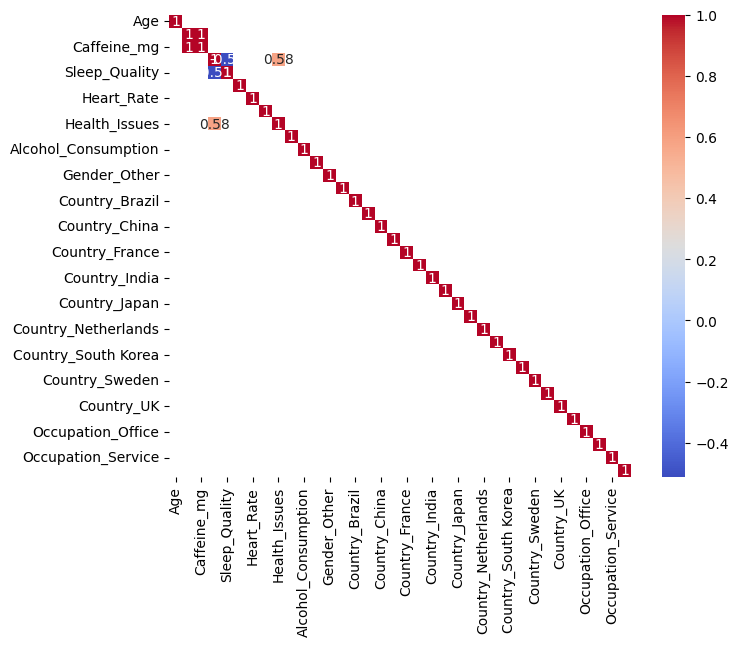

In [308]:
correlation_matrix = class_df.drop('Stress_Level', axis=1).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
mask = high_corr.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.show()

Получили, что столбцы Coffee_Intake и Caffeine_mg линейно зависимы, что в целом логично, чем больше кружек кофе выпьешь, тем больше кофеина получишь.

Столбцы Sleep_Quality и Sleep_Hours коррелируешь на -0,5, Health_Issues и Sleep_Hours - 0,6.

Удалим некоторые столбцы, чтобы избавиться от линейной зависимости.

In [193]:
class_x_test = class_x_test.drop(['Caffeine_mg'], axis=1)
class_x_train = class_x_train.drop(['Caffeine_mg'], axis=1)

In [194]:
knn_class = KNeighborsClassifier(n_neighbors=3)

knn_class.fit(class_x_train, class_y_train)
class_y_train_pred = knn_class.predict(class_x_train)
class_y_test_pred = knn_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       779
           1       0.98      0.99      0.98      5565
           2       0.91      0.89      0.90      1656

    accuracy                           0.95      8000
   macro avg       0.92      0.90      0.91      8000
weighted avg       0.95      0.95      0.95      8000

              precision    recall  f1-score   support

           0       0.63      0.57      0.60       182
           1       0.94      0.98      0.96      1424
           2       0.77      0.71      0.74       394

    accuracy                           0.89      2000
   macro avg       0.78      0.75      0.77      2000
weighted avg       0.88      0.89      0.88      2000



Удаление столбца Caffeine_mg, который давал большую корреляцию со столбцом Coffee_Intake привело пусь и к небольшому, но все же улучшению прогноза корящих людей на тестовой выборке.

#### Гипотеза 3

Посмотрим к чему приведет настрока гиперпараметров KNN-классификатора.

In [207]:
knn_class = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_class.fit(class_x_train, class_y_train)
class_y_train_pred = knn_class.predict(class_x_train)
class_y_test_pred = knn_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       779
           1       1.00      1.00      1.00      5565
           2       1.00      1.00      1.00      1656

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.83      0.55      0.67       182
           1       0.94      0.98      0.96      1424
           2       0.79      0.77      0.78       394

    accuracy                           0.90      2000
   macro avg       0.85      0.77      0.80      2000
weighted avg       0.90      0.90      0.90      2000



Очевидно, что при weights='distance' метрика на тренировочной выборке достигла максимуму. При этом и на тесте значение всех метрик увеличилось.

#### Гипотеза 4

Проведем нормализацию столбцов.

Начнем с min-max нормализации.

In [124]:
from sklearn.preprocessing import MinMaxScaler

In [241]:
scaler = MinMaxScaler()

features_to_normalize = class_df.drop(columns=['Stress_Level'])
scaled_features = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=features_to_normalize.columns)
class_df = pd.concat([scaled_features, class_df[['Stress_Level']]], axis=1)

In [242]:
class_train, class_test = train_test_split(class_df, test_size=0.2)

class_x_train = class_train.drop('Stress_Level', axis=1)
class_y_train = class_train['Stress_Level']

class_x_test = class_test.drop('Stress_Level', axis=1)
class_y_test = class_test['Stress_Level']

knn_class = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_class.fit(class_x_train, class_y_train)
class_y_train_pred = knn_class.predict(class_x_train)
class_y_test_pred = knn_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00      5580
           2       1.00      1.00      1.00      1655

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       196
           1       0.94      0.91      0.92      1409
           2       0.67      0.83      0.74       395

    accuracy                           0.86      2000
   macro avg       0.80      0.77      0.77      2000
weighted avg       0.87      0.86      0.86      2000



Применим Z-score нормализацию.

In [235]:
from sklearn.preprocessing import StandardScaler

In [246]:
scaler = StandardScaler()

features_to_normalize = class_df.drop(columns=['Stress_Level'])
scaled_features = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=features_to_normalize.columns)
class_df = pd.concat([scaled_features, class_df[['Stress_Level']]], axis=1)

In [237]:
class_train, class_test = train_test_split(class_df, test_size=0.2)

class_x_train = class_train.drop('Stress_Level', axis=1)
class_y_train = class_train['Stress_Level']

class_x_test = class_test.drop('Stress_Level', axis=1)
class_y_test = class_test['Stress_Level']

knn_class = KNeighborsClassifier(n_neighbors=4, weights='distance')

knn_class.fit(class_x_train, class_y_train)
class_y_train_pred = knn_class.predict(class_x_train)
class_y_test_pred = knn_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       1.00      1.00      1.00      5577
           2       1.00      1.00      1.00      1637

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       0.96      0.76      0.85       175
           1       0.94      0.97      0.96      1412
           2       0.89      0.87      0.88       413

    accuracy                           0.93      2000
   macro avg       0.93      0.87      0.89      2000
weighted avg       0.93      0.93      0.93      2000



Использование Z-score нормализации (помимо использования ранее найденных улучшений) дало еще лучший прирост по метрикам.

### Регрессия

#### Гипотеза 1

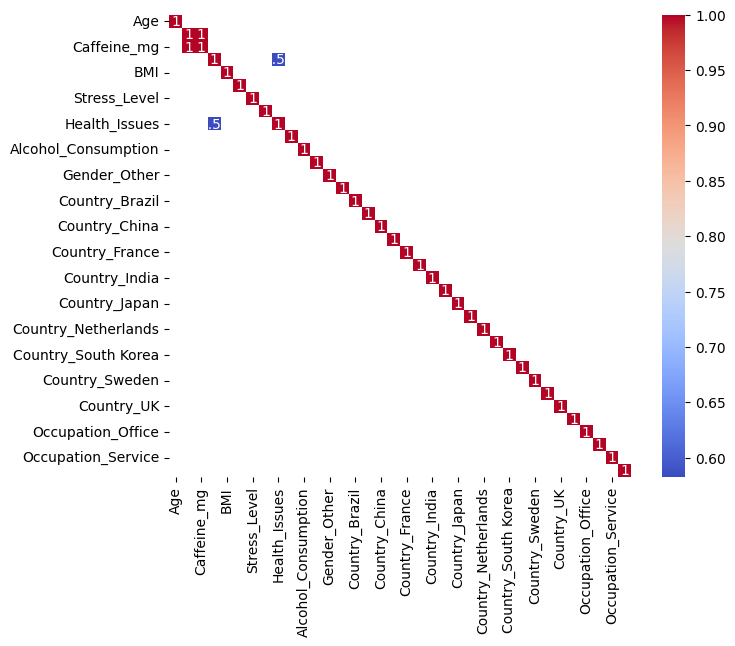

In [319]:
correlation_matrix = reg_df.drop('Sleep_Quality', axis=1).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
mask = high_corr.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.show()

Как и в случае с классификацией, можно сказать, что столбцы Coffee_Intake и Caffeine_mg линейно зависимы. Удалим один из них и проетстируем модель.

In [332]:
reg_x_test = reg_x_test.drop(['Caffeine_mg'], axis=1)
reg_x_train = reg_x_train.drop(['Caffeine_mg'], axis=1)

In [333]:
knn_reg = KNeighborsRegressor(n_neighbors=3)

knn_reg.fit(reg_x_train, reg_y_train)
reg_y_train_pred = knn_reg.predict(reg_x_train)
reg_y_test_pred = knn_reg.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.39655555555555555
Среднеквадратичная ошибка теста: 0.9041016666666667
Средняя абсолютная ошибка трейна: 0.47474166666666673
Средняя абсолютная ошибка теста: 0.7235833333333334


Ошибка уменьшилась как та трейне, так и на тесте, что является хорошим знаком.

#### Гипотеза 2

Потестируем модель с разными гиперпараметрами и выберем наилучший результат.

In [350]:
knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='manhattan')

knn_reg.fit(reg_x_train, reg_y_train)
reg_y_train_pred = knn_reg.predict(reg_x_train)
reg_y_test_pred = knn_reg.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.0
Среднеквадратичная ошибка теста: 0.6118669092647494
Средняя абсолютная ошибка трейна: 0.0
Средняя абсолютная ошибка теста: 0.5985573317664484


Использование в качестве метрики манхэттоновского расстояние привело к существенным улучшения на тестирующей выборке. Однако это повлияло на время работы алгоритма и сильно его замедлило. Поэтому порой важно чем-то жертвовать: либо качеством, либо временем работы.

#### Гипотеза 3

Проведем нормализацию (2 вида), обучим модель, протестируем и сделаем выводы.

Min-max нормализация

In [355]:
scaler = MinMaxScaler()

features_to_normalize = reg_df.drop(columns=['Sleep_Quality'])
scaled_features = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=features_to_normalize.columns)
reg_df_new = pd.concat([scaled_features, reg_df[['Sleep_Quality']]], axis=1)

In [356]:
reg_train_new, reg_test_new = train_test_split(reg_df_new, test_size=0.2)

reg_x_train_new = reg_train_new.drop('Sleep_Quality', axis=1)
reg_y_train_new = reg_train_new['Sleep_Quality']

reg_x_test_new = reg_test_new.drop('Sleep_Quality', axis=1)
reg_y_test_new = reg_test_new['Sleep_Quality']

knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='manhattan')

knn_reg.fit(reg_x_train_new, reg_y_train_new)
reg_y_train_pred = knn_reg.predict(reg_x_train_new)
reg_y_test_pred = knn_reg.predict(reg_x_test_new)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train_new)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test_new)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train_new)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test_new)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.0
Среднеквадратичная ошибка теста: 0.47906490449859085
Средняя абсолютная ошибка трейна: 0.0
Средняя абсолютная ошибка теста: 0.4308737578054134


Z-score нормализация

In [357]:
scaler = StandardScaler()

features_to_normalize = reg_df.drop(columns=['Sleep_Quality'])
scaled_features = pd.DataFrame(scaler.fit_transform(features_to_normalize), columns=features_to_normalize.columns)
class_df = pd.concat([scaled_features, reg_df[['Sleep_Quality']]], axis=1)

In [358]:
reg_train_new, reg_test_new = train_test_split(reg_df_new, test_size=0.2)

reg_x_train_new = reg_train_new.drop('Sleep_Quality', axis=1)
reg_y_train_new = reg_train_new['Sleep_Quality']

reg_x_test_new = reg_test_new.drop('Sleep_Quality', axis=1)
reg_y_test_new = reg_test_new['Sleep_Quality']

knn_reg = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='manhattan')

knn_reg.fit(reg_x_train_new, reg_y_train_new)
reg_y_train_pred = knn_reg.predict(reg_x_train_new)
reg_y_test_pred = knn_reg.predict(reg_x_test_new)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train_new)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test_new)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train_new)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test_new)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.0
Среднеквадратичная ошибка теста: 0.46238914094580924
Средняя абсолютная ошибка трейна: 0.0
Средняя абсолютная ошибка теста: 0.4253305801901215


Обе нормализации хорошо справились со своей задачей и смогли уменьшить ошибку на тестовой выборке на несколько десятых.

## Имплементация алгоритма

In [442]:
class KNearestNeighbors:
    def __init__(self, n_neighbors=5, regression=False):
        self.n_neighbors = n_neighbors
        self.regression = regression

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def _euclidean_distances(self, x_test_i):
        dist = []
        for index, row in self.X_train.iterrows():
            res = 0
            for i in range(len(x_test_i)):
                res += (x_test_i[i] - row.values[i]) ** 2
            res = res ** 0.5
            dist += [res]
        dist = np.array(dist)
        return dist
        # return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors]
        targets = []
        for i in range(len(k_nearest_indexes)):
            targets += [self.y_train.to_numpy()[k_nearest_indexes[i]]]
        targets = np.array(targets)
        return np.mean(targets) if self.regression else np.bincount(targets).argmax()

    def predict(self, X_test):
        predictions = []
        for index, row in X_test.iterrows():
            prediction = self._make_prediction(row.values)
            predictions.append(prediction)
        return np.array(predictions)

In [382]:
class_train, class_test = train_test_split(class_df, test_size=0.2)

for column in class_train.columns:
    if class_train[column].dtypes == bool:
        class_train[column] = class_train[column].astype(int)
for column in class_test.columns:
    if class_test[column].dtypes == bool:
        class_test[column] = class_test[column].astype(int)

In [383]:
class_x_train = class_train.drop('Stress_Level', axis=1)
class_y_train = class_train['Stress_Level']

class_x_test = class_test.drop('Stress_Level', axis=1)
class_y_test = class_test['Stress_Level']

In [ ]:
knn_class = KNearestNeighbors()

knn_class.fit(class_x_train, class_y_train)
class_y_train_pred = knn_class.predict(class_x_train)
# class_y_test_pred = knn_class.predict(class_x_test)